In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, KFold

In [2]:
reviews = pd.read_csv('balanced.csv')

In [97]:
reviews.iloc[1]

title                                                Get the large set
rating                                                             3.0
body                 go ahead and buy the large set the small set o...
y                                                                    1
cleaned_reviews      go ahead buy larg set small set paperback imoi...
classes                                                       moderate
cleaned_reviews_1    ['ahead', 'buy', 'larg', 'set', 'small', 'set'...
polarity                                                          -0.3
polarity_class                                                negative
Name: 1, dtype: object

In [95]:
a = reviews[reviews['classes']=='good']['body']

In [96]:
a.iloc[11]

'perfect for my airport extreme router wall mount'

<AxesSubplot:xlabel='polarity_class', ylabel='count'>

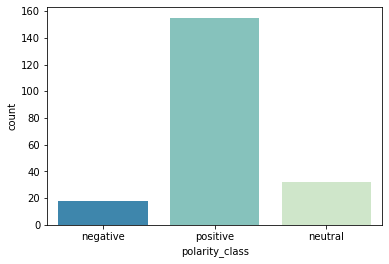

In [5]:
sns.countplot(x=reviews['polarity_class'], palette='GnBu_r')

<AxesSubplot:xlabel='classes', ylabel='count'>

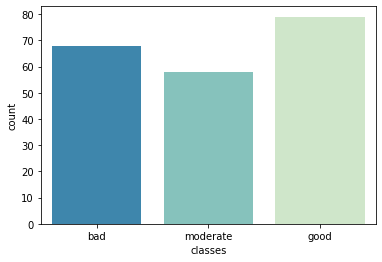

In [6]:
sns.countplot(x=reviews['classes'], palette='GnBu_r')

In [7]:
reviews['classes'].value_counts()

good        79
bad         68
moderate    58
Name: classes, dtype: int64

In [8]:
# performance mesurement

def model_performane(y_test, y_pred):
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [31]:
corpus = reviews['body']

In [32]:
def conv(x):
    if x == 'good':
        return 0
    elif x== 'moderate':
        return 1
    else:
        return 2

In [44]:
# convert text into vectors
cv = CountVectorizer(max_features = 909)

x = cv.fit_transform(corpus).toarray()
y = reviews['classes'].apply(lambda x: conv(x)).values

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [46]:
x_train.shape

(164, 909)

In [47]:
x_train[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

### Naive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

gaussNB_classifier = GaussianNB()
gaussNB_classifier.fit(x_train, y_train)

GaussianNB()

In [49]:
y_pred = gaussNB_classifier.predict(x_test)

In [50]:
model_performane(y_test,y_pred)

[[15  2  3]
 [ 0  4  0]
 [ 1  8  8]]
              precision    recall  f1-score   support

           0       0.94      0.75      0.83        20
           1       0.29      1.00      0.44         4
           2       0.73      0.47      0.57        17

    accuracy                           0.66        41
   macro avg       0.65      0.74      0.62        41
weighted avg       0.79      0.66      0.69        41



<AxesSubplot:ylabel='count'>

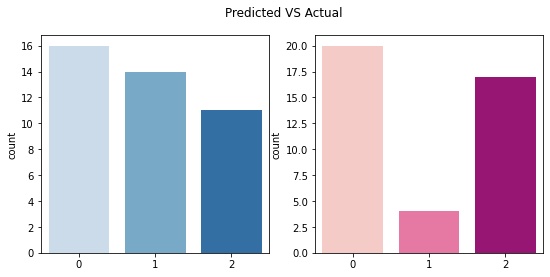

In [51]:
f, axs = plt.subplots(1,2, figsize=(9,4))
f.suptitle("Predicted VS Actual")

sns.countplot(x=y_pred, ax=axs[0], palette='Blues') #countplot for predicted values
sns.countplot(x=y_test, ax=axs[1], palette='RdPu') # countplot for actual values

#### Model 2

In [52]:
multiNB_classifier = MultinomialNB()
multiNB_classifier.fit(x_train, y_train)

y_predNB = multiNB_classifier.predict(x_test)
model_performane(y_test,y_predNB)

[[18  0  2]
 [ 0  2  2]
 [ 0  8  9]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.20      0.50      0.29         4
           2       0.69      0.53      0.60        17

    accuracy                           0.71        41
   macro avg       0.63      0.64      0.61        41
weighted avg       0.79      0.71      0.74        41



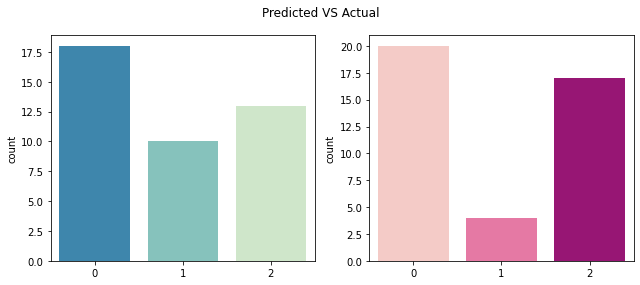

In [53]:
f, axs = plt.subplots(1,2, figsize=(9,4))
f.suptitle("Predicted VS Actual")

sns.countplot(x=y_predNB, ax=axs[0], palette='GnBu_r') #countplot for predicted values
sns.countplot(x=y_test, ax=axs[1], palette='RdPu') # countplot for actual values
f.tight_layout()

### Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
RFclassifier = RandomForestClassifier(n_estimators=10, criterion='gini', random_state=0)
RFclassifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [22]:
RFy_pred = RFclassifier.predict(x_test)

In [23]:
model_performane(y_test,RFy_pred)

[[ 9  3 11]
 [ 1 27  0]
 [ 3  1  7]]
              precision    recall  f1-score   support

         bad       0.69      0.39      0.50        23
        good       0.87      0.96      0.92        28
    moderate       0.39      0.64      0.48        11

    accuracy                           0.69        62
   macro avg       0.65      0.66      0.63        62
weighted avg       0.72      0.69      0.68        62



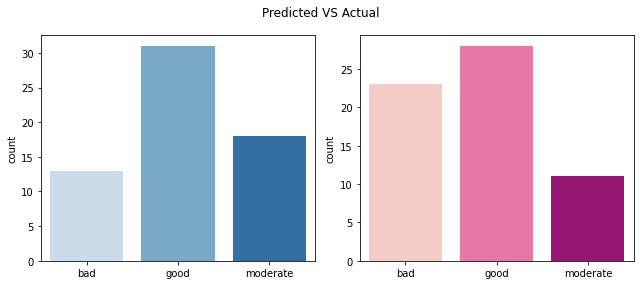

In [24]:
f, axs = plt.subplots(1,2, figsize=(9,4))
f.suptitle("Predicted VS Actual")

sns.countplot(x=RFy_pred, ax=axs[0], palette='Blues') #countplot for predicted values
sns.countplot(x=y_test, ax=axs[1], palette='RdPu') # countplot for actual values
f.tight_layout()

### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
logisticreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logisticreg.fit(x_train, y_train)

LogisticRegression(multi_class='multinomial')

In [27]:
logisticreg_pred = logisticreg.predict(x_test)

In [28]:
model_performane(y_test,logisticreg_pred)

[[15  1  7]
 [ 2 26  0]
 [ 4  0  7]]
              precision    recall  f1-score   support

         bad       0.71      0.65      0.68        23
        good       0.96      0.93      0.95        28
    moderate       0.50      0.64      0.56        11

    accuracy                           0.77        62
   macro avg       0.73      0.74      0.73        62
weighted avg       0.79      0.77      0.78        62



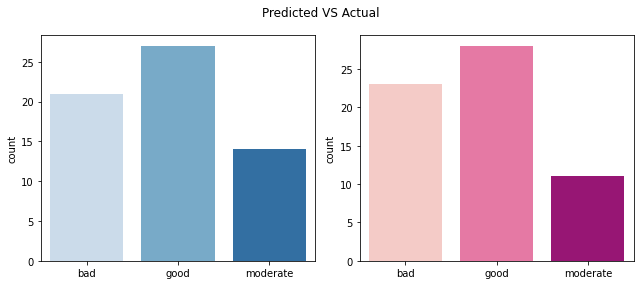

In [29]:
f, axs = plt.subplots(1,2, figsize=(9,4))
f.suptitle("Predicted VS Actual")

sns.countplot(x=logisticreg_pred, ax=axs[0], palette='Blues') #countplot for predicted values
sns.countplot(x=y_test, ax=axs[1], palette='RdPu') # countplot for actual values
f.tight_layout()

In [30]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Mean Accuracy: 0.742 (0.091)


In [31]:
n_scores

array([0.71428571, 0.80952381, 0.85714286, 0.85714286, 0.57142857,
       0.85      , 0.7       , 0.75      , 0.7       , 0.85      ,
       0.76190476, 0.76190476, 0.85714286, 0.71428571, 0.76190476,
       0.65      , 0.7       , 0.65      , 0.8       , 0.9       ,
       0.71428571, 0.61904762, 0.61904762, 0.76190476, 0.66666667,
       0.8       , 0.6       , 0.7       , 0.9       , 0.65      ])

### LGBM

In [32]:
from lightgbm import LGBMClassifier

In [33]:
lgb = LGBMClassifier()
lgb.fit(x_train, y_train)

LGBMClassifier()

In [34]:
lgb_pred = lgb.predict(x_test)

In [35]:
model_performane(y_test,lgb_pred)

[[17  4  7]
 [ 0  6  5]
 [ 1 10 12]]
              precision    recall  f1-score   support

           0       0.94      0.61      0.74        28
           1       0.30      0.55      0.39        11
           2       0.50      0.52      0.51        23

    accuracy                           0.56        62
   macro avg       0.58      0.56      0.55        62
weighted avg       0.67      0.56      0.59        62



In [36]:
from xgboost import XGBRFClassifier

In [37]:
xgb = XGBRFClassifier()
xgb.fit(x_train, y_train)

C:\Users\shiva\anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:55:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, enable_categorical=False, gamma=0,
                gpu_id=-1, importance_type=None, interaction_constraints='',
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=4,
                num_parallel_tree=100, objective='multi:softprob',
                predictor='auto', random_state=0, reg_alpha=0,
                scale_pos_weight=None, tree_method='exact',
                validate_parameters=1, verbosity=None)

In [38]:
xgb_pred = xgb.predict(x_test)

In [39]:
model_performane(y_test,xgb_pred)

[[26  0  2]
 [ 0  2  9]
 [ 2  9 12]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        28
           1       0.18      0.18      0.18        11
           2       0.52      0.52      0.52        23

    accuracy                           0.65        62
   macro avg       0.54      0.54      0.54        62
weighted avg       0.65      0.65      0.65        62



In [35]:
from sklearn.ensemble import AdaBoostClassifier

In [38]:
adaboost = AdaBoostClassifier()
adaboost.fit(x_train, y_train)

AdaBoostClassifier()

In [39]:
adaboost_pred = adaboost.predict(x_test)

In [40]:
model_performane(y_test,adaboost_pred)

[[ 0  0 23]
 [ 0  2 26]
 [ 1  0 10]]
              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        23
        good       1.00      0.07      0.13        28
    moderate       0.17      0.91      0.29        11

    accuracy                           0.19        62
   macro avg       0.39      0.33      0.14        62
weighted avg       0.48      0.19      0.11        62



### SVM

In [55]:
from sklearn.svm import SVC

svc = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
svc.fit(x_train, y_train)

svc_pred = svc.predict(x_test)

model_performane(y_test, svc_pred)

[[19  0  1]
 [ 1  2  1]
 [ 0  5 12]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.29      0.50      0.36         4
           2       0.86      0.71      0.77        17

    accuracy                           0.80        41
   macro avg       0.70      0.72      0.70        41
weighted avg       0.85      0.80      0.82        41



In [56]:
import pickle
with open('svmodel.pkl', 'wb') as pkl:
    pickle.dump(svc, pkl)

### Grid Search

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid = {'C': [0.1, 1, 10, 100, 1000, 10000], 'gamma': [1,0.1,0.01,0.001,0.0001,0.00001], 'kernel': ['rbf']} 

In [47]:
grid  = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

In [48]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.345 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.345 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.379 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.357 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.357 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.414 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.448 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.483 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.357 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.345 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.536 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.655 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.759 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.724 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.607 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.643 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.621 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.690 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.655 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.786 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.679 total time=   0.0s
[CV 1/5] END ...C=1000, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ['rbf']},
             verbose=3)

In [49]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [50]:
grid_predictions = grid.predict(x_test)

In [51]:
model_performane(y_pred, grid_predictions)

[[19  0  6]
 [ 6  7  8]
 [ 3  4  9]]
              precision    recall  f1-score   support

           0       0.68      0.76      0.72        25
           1       0.64      0.33      0.44        21
           2       0.39      0.56      0.46        16

    accuracy                           0.56        62
   macro avg       0.57      0.55      0.54        62
weighted avg       0.59      0.56      0.56        62



### Ridge Classifier

In [52]:
from sklearn.linear_model import RidgeClassifier

In [301]:
ridge = RidgeClassifier()
ridge.fit(x_train, y_train)

RidgeClassifier()

In [302]:
ridge_pred = ridge.predict(x_test)

In [303]:
model_performane(y_test, ridge_pred)

[[24  1  3]
 [ 0  8  3]
 [ 2  5 16]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.57      0.73      0.64        11
           2       0.73      0.70      0.71        23

    accuracy                           0.77        62
   macro avg       0.74      0.76      0.75        62
weighted avg       0.79      0.77      0.78        62



### Decision Tree

In [304]:
from sklearn.tree import DecisionTreeClassifier

In [305]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [306]:
dtree_pred = dtree.predict(x_test)

In [307]:
model_performane(y_test, dtree_pred)

[[26  0  2]
 [ 0  1 10]
 [ 1  9 13]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        28
           1       0.10      0.09      0.10        11
           2       0.52      0.57      0.54        23

    accuracy                           0.65        62
   macro avg       0.53      0.53      0.53        62
weighted avg       0.65      0.65      0.64        62



In [308]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_data = reviews.loc[:, 'cleaned_reviews']

In [309]:
num_words = 1000
oov_token = '<UNK>'
pad_type = 'post'
trunc_type = 'post'

In [310]:
# Tokenize our training data
tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token)
tokenizer.fit_on_texts(train_data)

# Get our training data word index
word_index = tokenizer.word_index

# Encode training data sentences into sequences
train_sequences = tokenizer.texts_to_sequences(train_data)

# Get max training sequence length
maxlen = max([len(x) for x in train_sequences])

# Pad the training sequences
train_padded = pad_sequences(train_sequences, padding=pad_type, truncating=trunc_type, maxlen=maxlen)

# Output the results of our work
print("Word index:\n", word_index)
print("\nTraining sequences:\n", train_sequences)
print("\nPadded training sequences:\n", train_padded)
print("\nPadded training shape:", train_padded.shape)
print("Training sequences data type:", type(train_sequences))
print("Padded Training sequences data type:", type(train_padded))

Word index:
 {'<UNK>': 1, 'book': 2, 'great': 3, 'look': 4, 'hold': 5, 'shelf': 6, 'wall': 7, 'use': 8, 'one': 9, 'work': 10, 'screw': 11, 'instal': 12, 'size': 13, 'fit': 14, 'get': 15, 'easi': 16, 'put': 17, 'larg': 18, 'need': 19, 'would': 20, 'like': 21, 'bought': 22, 'perfect': 23, 'product': 24, 'shelv': 25, 'realli': 26, 'cover': 27, 'bottom': 28, 'weight': 29, 'stack': 30, 'idea': 31, 'well': 32, 'dont': 33, 'anchor': 34, 'make': 35, 'float': 36, 'even': 37, 'item': 38, 'enough': 39, 'im': 40, 'larger': 41, 'order': 42, 'could': 43, 'hardwar': 44, 'bookshelf': 45, 'standard': 46, 'keep': 47, 'want': 48, 'mount': 49, 'much': 50, 'come': 51, 'singl': 52, 'way': 53, 'buy': 54, 'hardcov': 55, 'go': 56, 'big': 57, 'reach': 58, 'thing': 59, 'smaller': 60, 'expect': 61, 'purchas': 62, 'lb': 63, 'set': 64, 'small': 65, 'doesnt': 66, 'tri': 67, 'place': 68, 'disappoint': 69, 'bend': 70, 'good': 71, 'think': 72, 'pretti': 73, 'also': 74, 'didnt': 75, 'hole': 76, 'littl': 77, 'hous': 78, 

In [311]:
for x, y in zip(train_data, train_padded):
  print('{} -> {}'.format(x, y))

print("\nWord index (for reference):", word_index)

call less lb max depth book book lb less see signific downward slope stack enough book cover back bracket left feel uncomfort use especi sinc instal includ hardwar anchor spun around wall use differ screw secur bracket cant happi hold go make l bracket larger book -> [282 110  63 283 161   2   2  63 110  79 432 219 284  30  39   2  27  93
  94 433 111 434   8 435 162  12  80  44  34 436 163   7   8  81  11 220
  94 136 164   5  56  35 437  94  41   2   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0]
go ahead buy larg set small set paperback imoi instal stud hardcov book start wobblesolid design small thin -> [ 56 285  54  18  64  65  64 165 438  12  82  55   2 221 439  83  65 440
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Flatten

In [89]:
model = Sequential()

#two hidden layers and 1 output layer
model.add(Dense(35,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [90]:
model.fit(x=x_train,y=y_train,
          validation_data=(x_test,y_test),
          batch_size=100,epochs=70)

Epoch 1/70
2/2 [==============================] - 0s 82ms/step - loss: 1.1436 - accuracy: 0.3659 - val_loss: 1.0871 - val_accuracy: 0.4878
Epoch 2/70
2/2 [==============================] - 0s 11ms/step - loss: 1.0978 - accuracy: 0.4024 - val_loss: 1.0683 - val_accuracy: 0.4878
Epoch 3/70
2/2 [==============================] - 0s 16ms/step - loss: 1.0583 - accuracy: 0.4329 - val_loss: 1.0541 - val_accuracy: 0.5610
Epoch 4/70
2/2 [==============================] - 0s 24ms/step - loss: 1.0286 - accuracy: 0.5061 - val_loss: 1.0419 - val_accuracy: 0.6341
Epoch 5/70
2/2 [==============================] - 0s 20ms/step - loss: 1.0006 - accuracy: 0.5732 - val_loss: 1.0301 - val_accuracy: 0.6341
Epoch 6/70
2/2 [==============================] - 0s 24ms/step - loss: 0.9740 - accuracy: 0.6524 - val_loss: 1.0184 - val_accuracy: 0.6829
Epoch 7/70
2/2 [==============================] - 0s 16ms/step - loss: 0.9496 - accuracy: 0.7073 - val_loss: 1.0057 - val_accuracy: 0.6585
Epoch 8/70
2/2 [===========

In [91]:
predictions1 = model.predict_classes(x_test)

In [92]:
predictions1

array([1, 0, 1, 2, 0, 0, 2, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 2, 2,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 0, 0, 1, 2, 2],
      dtype=int64)

In [93]:
model_performane(y_test,predictions1)

[[19  0  1]
 [ 0  4  0]
 [ 1  6 10]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.40      1.00      0.57         4
           2       0.91      0.59      0.71        17

    accuracy                           0.80        41
   macro avg       0.75      0.85      0.75        41
weighted avg       0.88      0.80      0.82        41



In [123]:
x.shape

(205, 500)

In [124]:
n_features = 500

In [125]:
n_fshape = 1
x = x.reshape((x.shape[0], x.shape[1], n_fshape))

In [128]:
model = Sequential()

model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_features ,n_fshape)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x, y, epochs=100, verbose=1)

Epoch 1/100
7/7 [==============================] - 3s 391ms/step - loss: 1.0985 - accuracy: 0.3854
Epoch 2/100
7/7 [==============================] - 3s 412ms/step - loss: 1.0974 - accuracy: 0.3854
Epoch 3/100
7/7 [==============================] - 3s 408ms/step - loss: 1.0966 - accuracy: 0.3854
Epoch 4/100
7/7 [==============================] - 3s 386ms/step - loss: 1.0954 - accuracy: 0.3854
Epoch 5/100
7/7 [==============================] - 3s 406ms/step - loss: 1.0937 - accuracy: 0.3854
Epoch 6/100
7/7 [==============================] - 3s 404ms/step - loss: 1.0909 - accuracy: 0.4146
Epoch 7/100
7/7 [==============================] - 3s 373ms/step - loss: 1.0848 - accuracy: 0.4390
Epoch 8/100
7/7 [==============================] - 3s 409ms/step - loss: nan - accuracy: 0.4293
Epoch 9/100
7/7 [==============================] - 3s 436ms/step - loss: nan - accuracy: 0.3854
Epoch 10/100
7/7 [==============================] - 3s 403ms/step - loss: nan - accuracy: 0.3854
Epoch 11/100
7/7 [

In [89]:
from sklearn.utils import class_weight

#class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

C:\Users\shiva\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1 2], y=[2 2 0 0 1 2 1 0 0 2 1 0 1 2 1 1 0 0 2 1 0 2 1 2 2 1 2 0 1 1 0 1 1 0 2 2 2
 0 2 0 1 1 1 0 0 1 0 0 0 1 2 1 2 1 2 2 2 1 0 0 0 1 2 2 1 0 0 2 2 2 2 2 2 0
 1 1 1 2 1 0 2 0 2 0 0 1 1 1 1 0 0 2 2 2 2 0 0 0 1 0 2 1 1 2 2 2 1 1 0 1 1
 0 0 1 2 0 2 0 0 1 1 1 0 2 0 0 0 1 0 0 0 0 1 2 2 0 1 2 0 0 2 2 1 0 2 0 0 0
 2 1 0 2 2 1 1 1 1 2 0 1 0 1 1 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [93]:
class_weights1 = {0:0.92655367, 1:1.01234568, 2:1.07189542}

In [94]:
from sklearn.svm import SVC

svc1 = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', class_weight = class_weights1)
svc1.fit(x_train, y_train)

svc_pred1 = svc1.predict(x_test)

model_performane(y_test, svc_pred1)

[[20  0  0]
 [ 4  0  0]
 [ 6  7  4]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        20
           1       0.00      0.00      0.00         4
           2       1.00      0.24      0.38        17

    accuracy                           0.59        41
   macro avg       0.56      0.41      0.39        41
weighted avg       0.74      0.59      0.55        41

